This project is mainly about effectively cleaning and preparing data, but we will also, at the end, run a quick linear model to see how accurately we might be able to predict the likelihood of death from COVID based on diet.

In [34]:
# Read in the data and libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
food = pd.read_csv("C:\\Users\\user\\Desktop\\Data\\COVID food.csv")
food.head() # Check the first five rows


,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.100298,0.003702,0.083683,0.012914,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,0.436399,0.012755,0.244538,0.179105,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.112330,0.003769,0.079011,0.029549,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.012272,0.000467,0.004443,0.007361,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,NaN,0.097959,0.003061,0.093878,0.001020,98000.0,%


In [35]:
# Let's inspect the dataset to to see what information we have here: first what are our columns
print(food.columns)

Index(['Country', 'Alcoholic Beverages', 'Animal fats', 'Animal Products',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners',
       'Sugar Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables',
       'Vegetal Products', 'Obesity', 'Undernourished', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Population', 'Unit (all except Population)'],
      dtype='object')


Our columns cover a range of foodstuffs, with the proportion of fodd intake that comes from that foodstuff, in that country. It also includes data on obesity, nourishment and coronavirus infections (including deaths and recoveries) and, finally, the population. We'll now inspect the dataset for null values, and also see the range of data in our columns.

In [36]:
# Inspect the dataset for null values
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       170 non-null    object 
 1   Alcoholic Beverages           170 non-null    float64
 2   Animal fats                   170 non-null    float64
 3   Animal Products               170 non-null    float64
 4   Aquatic Products, Other       170 non-null    float64
 5   Cereals - Excluding Beer      170 non-null    float64
 6   Eggs                          170 non-null    float64
 7   Fish, Seafood                 170 non-null    float64
 8   Fruits - Excluding Wine       170 non-null    float64
 9   Meat                          170 non-null    float64
 10  Milk - Excluding Butter       170 non-null    float64
 11  Miscellaneous                 170 non-null    float64
 12  Offals                        170 non-null    float64
 13  Oilcr

In [37]:
# We have some null values in our columns covering obesity, nourishment and COVID morbidity. Let's see how many different rows
# have null values
for i in range(len(food.index)) :
    print("Nan in row ", i , " : " ,  food.iloc[i].isnull().sum())

Nan in row  0  :  0
Nan in row  1  :  0
Nan in row  2  :  0
Nan in row  3  :  0
Nan in row  4  :  1
Nan in row  5  :  0
Nan in row  6  :  0
Nan in row  7  :  0
Nan in row  8  :  0
Nan in row  9  :  0
Nan in row  10  :  1
Nan in row  11  :  0
Nan in row  12  :  0
Nan in row  13  :  0
Nan in row  14  :  0
Nan in row  15  :  0
Nan in row  16  :  0
Nan in row  17  :  0
Nan in row  18  :  0
Nan in row  19  :  0
Nan in row  20  :  0
Nan in row  21  :  0
Nan in row  22  :  0
Nan in row  23  :  0
Nan in row  24  :  0
Nan in row  25  :  0
Nan in row  26  :  1
Nan in row  27  :  0
Nan in row  28  :  0
Nan in row  29  :  1
Nan in row  30  :  0
Nan in row  31  :  0
Nan in row  32  :  0
Nan in row  33  :  0
Nan in row  34  :  0
Nan in row  35  :  0
Nan in row  36  :  0
Nan in row  37  :  0
Nan in row  38  :  0
Nan in row  39  :  0
Nan in row  40  :  0
Nan in row  41  :  0
Nan in row  42  :  0
Nan in row  43  :  0
Nan in row  44  :  0
Nan in row  45  :  0
Nan in row  46  :  0
Nan in row  47  :  0
Na

In [38]:
# We have some rows with just one NaN, but some have 4 or even 5. Let's drop those rows, and for those that have just one missing
# value we'll replace it with the mean
rows = []
for i in range(len(food.index)):
    if food.iloc[i].isnull().sum() > 1:
        rows.append(i)
rows # This will give us our list or rows with more than 1 NaN
        

[52, 80, 81, 105, 109, 131, 139, 155, 164]

In [39]:
# We can check this is right by viewing a couple of the rows:
print(food.iloc[52])
print(food.iloc[80])

Country                         French Polynesia
Alcoholic Beverages                       4.6997
Animal fats                               0.0309
Animal Products                          14.3585
Aquatic Products, Other                   0.0169
Cereals - Excluding Beer                  7.6479
Eggs                                      0.5386
Fish, Seafood                             3.4809
Fruits - Excluding Wine                   4.3512
Meat                                      7.0798
Milk - Excluding Butter                   2.9364
Miscellaneous                             3.2613
Offals                                    0.2748
Oilcrops                                  3.1818
Pulses                                    0.1452
Spices                                    0.0111
Starchy Roots                             3.5436
Stimulants                                 0.126
Sugar & Sweeteners                        2.8715
Sugar Crops                               0.6809
Treenuts            

In [40]:
# We can see that they both have more than 1 NaN. Let's drop all of these from the dataframe.
food.drop(food.index[rows], inplace=True)

In [41]:
# Now we can fill in the other NaNs with the mean value of that column
food = food.fillna(food.mean())
food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 169
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       161 non-null    object 
 1   Alcoholic Beverages           161 non-null    float64
 2   Animal fats                   161 non-null    float64
 3   Animal Products               161 non-null    float64
 4   Aquatic Products, Other       161 non-null    float64
 5   Cereals - Excluding Beer      161 non-null    float64
 6   Eggs                          161 non-null    float64
 7   Fish, Seafood                 161 non-null    float64
 8   Fruits - Excluding Wine       161 non-null    float64
 9   Meat                          161 non-null    float64
 10  Milk - Excluding Butter       161 non-null    float64
 11  Miscellaneous                 161 non-null    float64
 12  Offals                        161 non-null    float64
 13  Oilcr

In [42]:
# The undernourished column still has several NaNs - let's inspect it to see why
print(food["Undernourished"].describe())
print(food["Undernourished"].value_counts())

count      154
unique      92
top       <2.5
freq        44
Name: Undernourished, dtype: object
<2.5    44
6.2      3
16.5     3
5.5      2
5.7      2
        ..
26.4     1
4.9      1
18.9     1
11.3     1
16.1     1
Name: Undernourished, Length: 92, dtype: int64


In [43]:
# The dtype is object, so let's change it to a float an impute the mean to the null values
food["Undernourished"] = food["Undernourished"].str.replace("<","")
food["Undernourished"] = pd.to_numeric(food["Undernourished"], downcast="float")
food["Undernourished"].fillna(food["Undernourished"].mean(), inplace=True)
food["Undernourished"] = food["Undernourished"].replace("2.5","<2.5")
print(food["Undernourished"].describe())
print(food.info())
   
    

count    161.000000
mean      11.258443
std       11.542651
min        2.500000
25%        2.500000
50%        7.100000
75%       14.500000
max       59.599998
Name: Undernourished, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 169
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       161 non-null    object 
 1   Alcoholic Beverages           161 non-null    float64
 2   Animal fats                   161 non-null    float64
 3   Animal Products               161 non-null    float64
 4   Aquatic Products, Other       161 non-null    float64
 5   Cereals - Excluding Beer      161 non-null    float64
 6   Eggs                          161 non-null    float64
 7   Fish, Seafood                 161 non-null    float64
 8   Fruits - Excluding Wine       161 non-null    float64
 9   Meat                          161 non-null  

We now have a lovely clean dataset with no null values! However, our dataframe is still too full of columns, so let's drop those that represent very small foodgroups

In [44]:
# let's see what the mean value is in each column to see how significant a proportion of world diets they make up
columns = food.columns[1:23]
column_means = pd.DataFrame(columns=["Foodstuff", "Mean"])
for col in columns:
    print(col, "mean=", food[col].mean())

Alcoholic Beverages mean= 3.10406708074534
Animal fats mean= 0.22668633540372674
Animal Products mean= 12.306031055900617
Aquatic Products, Other mean= 0.013301242236024843
Cereals - Excluding Beer mean= 11.881618633540368
Eggs mean= 0.4764062111801241
Fish, Seafood mean= 1.314031677018633
Fruits - Excluding Wine mean= 5.625004968944098
Meat mean= 3.344098136645964
Milk - Excluding Butter mean= 6.734932919254659
Miscellaneous mean= 0.40756086956521764
Offals mean= 0.19666645962732923
Oilcrops mean= 0.5869819875776398
Pulses mean= 0.5454360248447208
Spices mean= 0.09350993788819878
Starchy Roots mean= 5.21151863354037
Stimulants mean= 0.20751739130434776
Sugar & Sweeteners mean= 2.8414602484472065
Sugar Crops mean= 0.09695217391304346
Treenuts mean= 0.11978198757763973
Vegetable Oils mean= 0.8624298136645959
Vegetables mean= 6.113573913043478


In [45]:
# From here we can pick out the most important foodgroups and analyse those, dropping those that are less that 1% of a nation's
# intake, on average
cols_to_drop = []
for col in columns:
    if food[col].mean() < 1:
        cols_to_drop.append(col)
food.drop(cols_to_drop, axis=1, inplace=True)
food.head()    


,Country,Alcoholic Beverages,Animal Products,Cereals - Excluding Beer,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Starchy Roots,Sugar & Sweeteners,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,9.4341,24.8097,0.0350,5.3495,1.2020,7.5828,0.8802,1.3489,6.7642,40.5645,4.5,29.799999,0.100298,0.003702,0.083683,0.012914,38928000.0,%
1,Albania,1.6719,18.7684,5.7817,0.2126,6.7861,1.8845,15.7213,1.8096,1.5367,11.7753,31.2304,22.3,6.200000,0.436399,0.012755,0.244538,0.179105,2838000.0,%
2,Algeria,0.2711,9.6334,13.6816,0.2416,6.3801,1.1305,7.6189,4.1340,1.8342,11.6484,40.3651,26.6,3.900000,0.112330,0.003769,0.079011,0.029549,44357000.0,%
3,Angola,5.8087,4.9278,9.1085,1.7707,6.0005,2.0571,0.8311,18.1102,1.8495,2.3041,45.0722,6.8,25.000000,0.012272,0.000467,0.004443,0.007361,32522000.0,%
4,Antigua and Barbuda,3.5764,16.6613,5.9960,4.1489,10.7451,5.6888,6.3663,1.4522,3.8749,5.4495,33.3233,19.1,11.258443,0.097959,0.003061,0.093878,0.001020,98000.0,%


In [46]:
# Let's also drop the unit column as that doesn't add any extra information - we know that they're all % except population
food.drop(["Unit (all except Population)"], axis=1, inplace=True)
food.head()

,Country,Alcoholic Beverages,Animal Products,Cereals - Excluding Beer,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Starchy Roots,Sugar & Sweeteners,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
0,Afghanistan,0.0014,9.4341,24.8097,0.0350,5.3495,1.2020,7.5828,0.8802,1.3489,6.7642,40.5645,4.5,29.799999,0.100298,0.003702,0.083683,0.012914,38928000.0
1,Albania,1.6719,18.7684,5.7817,0.2126,6.7861,1.8845,15.7213,1.8096,1.5367,11.7753,31.2304,22.3,6.200000,0.436399,0.012755,0.244538,0.179105,2838000.0
2,Algeria,0.2711,9.6334,13.6816,0.2416,6.3801,1.1305,7.6189,4.1340,1.8342,11.6484,40.3651,26.6,3.900000,0.112330,0.003769,0.079011,0.029549,44357000.0
3,Angola,5.8087,4.9278,9.1085,1.7707,6.0005,2.0571,0.8311,18.1102,1.8495,2.3041,45.0722,6.8,25.000000,0.012272,0.000467,0.004443,0.007361,32522000.0
4,Antigua and Barbuda,3.5764,16.6613,5.9960,4.1489,10.7451,5.6888,6.3663,1.4522,3.8749,5.4495,33.3233,19.1,11.258443,0.097959,0.003061,0.093878,0.001020,98000.0


Now we have a more manageable dataset and can begin to visualise the relationships between the columns

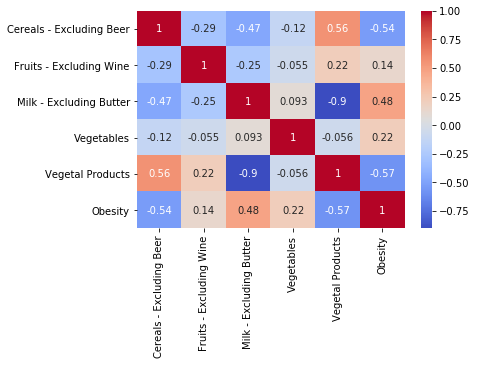

In [47]:
# Let's take some major foodgroups and look at correlations between them and obesity levels
obesity_corr = food[["Cereals - Excluding Beer", "Fruits - Excluding Wine", "Milk - Excluding Butter", "Vegetables", "Vegetal Products", "Obesity"]]
sns.heatmap(obesity_corr.corr(), cmap="coolwarm", annot=True)
plt.show()

As we might expect, negative correlation between obesity and cereals, vegetable products, and postive correlation between
milk and obesity. interstingly, though, we see a positive correlation between vegetables and obesity, which we might not expect.

If we look at just food intake, can we predict accurately the chances of surving COVID? We can use linear regression to find out

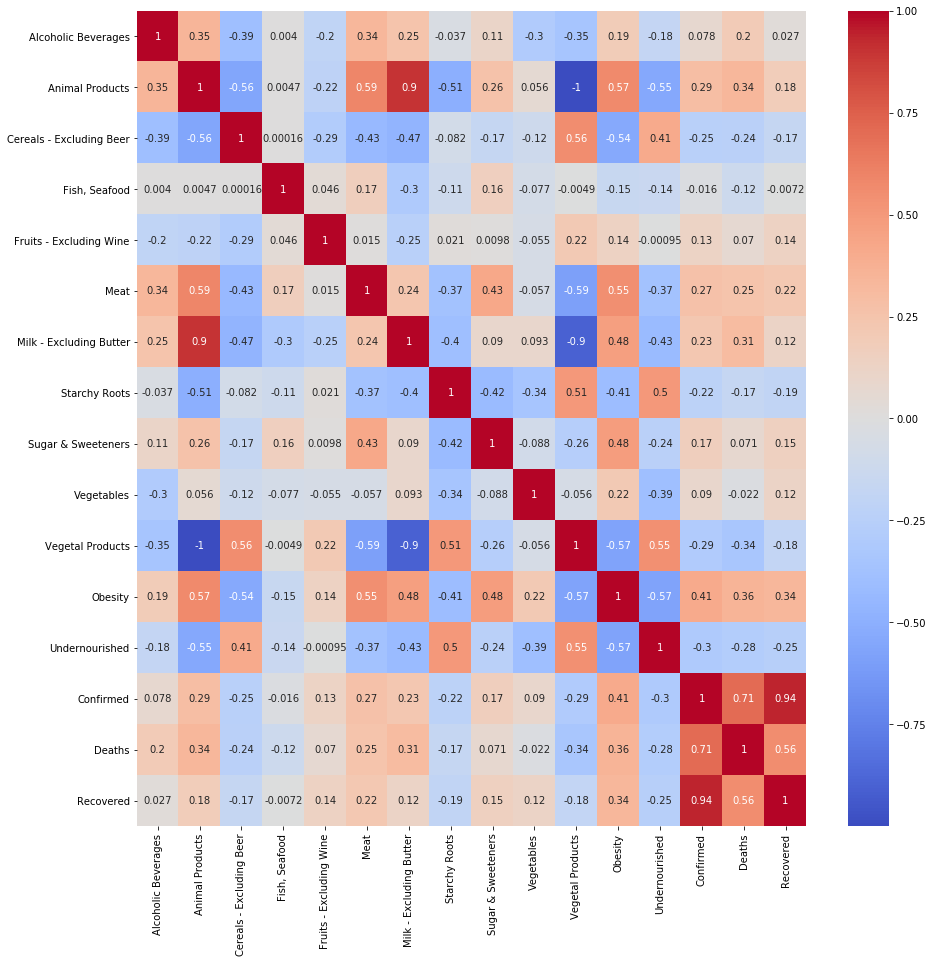

In [48]:
# We'll check where the strongest correlations are first to see which features we should use
cols_to_compare = food.columns[1:17]
fig=plt.subplots(figsize=(15,15))
sns.heatmap(food[cols_to_compare].corr(), cmap="coolwarm", annot=True)
plt.show()


We're going to try to predict death, so that's the columns we're most intersted in. We will take any coorelation that is -0.25 > x > 0.25, meaning we'll take Animal Products, Meat, Milk, and Vegetable Products for our model 

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
features = ["Animal Products", "Meat", "Milk - Excluding Butter", "Vegetal Products"]
x = food[features]
y = food["Deaths"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
mse = mean_squared_error(predictions, y_test)
print("RMSE: ", np.sqrt(mse))

RMSE:  0.01886557288694206


This looks like low RMSE just because it's a small number, but we should look at the range of values for "Deaths" to see how it stacks up

In [50]:
food["Deaths"].describe()

count    161.000000
mean       0.012088
std        0.018785
min        0.000000
25%        0.000936
50%        0.004132
75%        0.013187
max        0.095567
Name: Deaths, dtype: float64

Here we see that 75% of the values are below 0.013 - this means that an error of 0.019 isn't particularly good and we will have to do more work on the model for it to be useful.